# Respiratory Virus EDA
### Preventive Restock Based on Risk — Data Exploration
**Source:** EU-ECDC Respiratory Viruses Weekly Data  
**Goal:** Understand data structure, coverage, and seasonality patterns as foundation for Holt-Winters forecasting and TDA anomaly detection.

## 0. Imports & Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Plot style
sns.set_theme(style='whitegrid', palette='tab10')
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['figure.dpi'] = 100

BASE = 'https://raw.githubusercontent.com/EU-ECDC/Respiratory_viruses_weekly_data/main/data/'

FILES = [
    'ILIARIRates.csv',
    'SARIRates.csv',
    'SARITestsDetectionsPositivity.csv',
    'activityFluTypeSubtype.csv',
    'nonSentinelSeverity.csv',
    'nonSentinelTestsDetections.csv',
    'sentinelTestsDetectionsPositivity.csv',
    'sequencingVolumeDetectablePrevalence.csv',
    'variants.csv'
]

print('Libraries loaded ✓')

Libraries loaded ✓


## 1. Load All Files

In [4]:
dfs = {}
for file in FILES:
    try:
        dfs[file] = pd.read_csv(BASE + file)
        print(f'{file:<55} shape: {dfs[file].shape}')
    except Exception as e:
        print(f'{file:<55} ERROR: {e}')

ILIARIRates.csv                                         shape: (37887, 6)
SARIRates.csv                                           shape: (10559, 6)
SARITestsDetectionsPositivity.csv                       shape: (25862, 9)
activityFluTypeSubtype.csv                              shape: (30372, 9)
nonSentinelSeverity.csv                                 shape: (84383, 8)
nonSentinelTestsDetections.csv                          shape: (113285, 9)
sentinelTestsDetectionsPositivity.csv                   shape: (52946, 9)
sequencingVolumeDetectablePrevalence.csv                shape: (7260, 9)
variants.csv                                            shape: (40823, 9)


## 2. Structural Reconnaissance
For each file: columns, dtypes, nulls, and first rows.

In [3]:
for name, df in dfs.items():
    print(f"\n{'='*65}")
    print(f"{name}")
    print(f"Shape : {df.shape}")
    print(f"Columns: {list(df.columns)}")
    null_pct = (df.isnull().sum() / len(df) * 100).round(1)
    null_pct = null_pct[null_pct > 0]
    if not null_pct.empty:
        print(f"Nulls: {null_pct.to_dict()}")
    else:
        print(f"Nulls: none")
    display(df.head(3))


ILIARIRates.csv
Shape : (37887, 6)
Columns: ['survtype', 'countryname', 'yearweek', 'indicator', 'age', 'value']
Nulls: none


,survtype,countryname,yearweek,indicator,age,value
0,primary care syndromic,Austria,2026-W07,ILIconsultationrate,0-4,1501.5
1,primary care syndromic,Austria,2026-W07,ILIconsultationrate,15-64,3536.8
2,primary care syndromic,Austria,2026-W07,ILIconsultationrate,5-14,1366.1



SARIRates.csv
Shape : (10559, 6)
Columns: ['survtype', 'countryname', 'yearweek', 'indicator', 'age', 'value']
Nulls: none


,survtype,countryname,yearweek,indicator,age,value
0,SARI syndromic,Austria,2026-W07,SARIrate,0-4,46.7
1,SARI syndromic,Austria,2026-W07,SARIrate,15-64,1.8
2,SARI syndromic,Austria,2026-W07,SARIrate,5-14,2.8



SARITestsDetectionsPositivity.csv
Shape : (25862, 9)
Columns: ['survtype', 'countryname', 'yearweek', 'pathogen', 'pathogentype', 'pathogensubtype', 'indicator', 'age', 'value']
Nulls: {'pathogensubtype': 7.8}


,survtype,countryname,yearweek,pathogen,pathogentype,pathogensubtype,indicator,age,value
0,SARI virological,Belgium,2026-W06,Influenza,Influenza,total,detections,total,71.0
1,SARI virological,Belgium,2026-W06,Influenza,Influenza,total,positivity,total,36.0
2,SARI virological,Belgium,2026-W06,Influenza,Influenza,total,tests,total,197.0



activityFluTypeSubtype.csv
Shape : (30372, 9)
Columns: ['survtype', 'countryname', 'yearweek', 'pathogen', 'pathogentype', 'pathogensubtype', 'indicator', 'age', 'value']
Nulls: {'pathogensubtype': 25.3}


,survtype,countryname,yearweek,pathogen,pathogentype,pathogensubtype,indicator,age,value
0,non-sentinel,Austria,2026-W07,Influenza,Influenza A,A (unknown),detections,total,49
1,non-sentinel,Austria,2026-W07,RSV,RSV untyped,NaN,detections,total,69
2,non-sentinel,Austria,2026-W06,Influenza,Influenza A,A (unknown),detections,total,101



nonSentinelSeverity.csv
Shape : (84383, 8)
Columns: ['survtype', 'countryname', 'yearweek', 'pathogen', 'pathogentype', 'indicator', 'age', 'value']
Nulls: none


,survtype,countryname,yearweek,pathogen,pathogentype,indicator,age,value
0,non-sentinel,Austria,2023-W25,SARS-CoV-2,SARS-CoV-2,deaths,0-4,0
1,non-sentinel,Austria,2023-W25,SARS-CoV-2,SARS-CoV-2,deaths,15-64,2
2,non-sentinel,Austria,2023-W25,SARS-CoV-2,SARS-CoV-2,deaths,5-14,0



nonSentinelTestsDetections.csv
Shape : (113285, 9)
Columns: ['survtype', 'countryname', 'yearweek', 'pathogen', 'pathogentype', 'pathogensubtype', 'indicator', 'age', 'value']
Nulls: {'pathogensubtype': 4.3}


,survtype,countryname,yearweek,pathogen,pathogentype,pathogensubtype,indicator,age,value
0,non-sentinel,Austria,2026-W07,Influenza,Influenza,total,detections,total,49
1,non-sentinel,Austria,2026-W07,Influenza,Influenza,total,tests,total,568
2,non-sentinel,Austria,2026-W07,Influenza,Influenza A,A (unknown),detections,total,49



sentinelTestsDetectionsPositivity.csv
Shape : (52946, 9)
Columns: ['survtype', 'countryname', 'yearweek', 'pathogen', 'pathogentype', 'pathogensubtype', 'indicator', 'age', 'value']
Nulls: {'pathogensubtype': 5.2}


,survtype,countryname,yearweek,pathogen,pathogentype,pathogensubtype,indicator,age,value
0,primary care sentinel,Austria,2026-W07,Influenza,Influenza,total,detections,total,30.0
1,primary care sentinel,Austria,2026-W07,Influenza,Influenza,total,positivity,total,13.9
2,primary care sentinel,Austria,2026-W07,Influenza,Influenza,total,tests,total,216.0



sequencingVolumeDetectablePrevalence.csv
Shape : (7260, 9)
Columns: ['survtype', 'datasource', 'countryname', 'yearweek', 'pathogen', 'indicator', 'age', 'value', 'detectableprevalence']
Nulls: none


,survtype,datasource,countryname,yearweek,pathogen,indicator,age,value,detectableprevalence
0,SARS-CoV-2 variant,GISAID,Austria,2026-W06,SARS-CoV-2,2-week count of sequences,total,0,No data
1,SARS-CoV-2 variant,GISAID,Austria,2026-W05,SARS-CoV-2,2-week count of sequences,total,0,No data
2,SARS-CoV-2 variant,GISAID,Austria,2026-W04,SARS-CoV-2,2-week count of sequences,total,0,No data



variants.csv
Shape : (40823, 9)
Columns: ['survtype', 'datasource', 'countryname', 'yearweek', 'pathogen', 'variant', 'indicator', 'age', 'value']
Nulls: none


,survtype,datasource,countryname,yearweek,pathogen,variant,indicator,age,value
0,SARS-CoV-2 variant,GISAID,Austria,2025-W22,SARS-CoV-2,BA.2.86,detections,total,1.0
1,SARS-CoV-2 variant,GISAID,Austria,2025-W22,SARS-CoV-2,Other,detections,total,1.0
2,SARS-CoV-2 variant,GISAID,Austria,2025-W22,SARS-CoV-2,BA.2.86,proportion,total,50.0


## Step 3 — Focus: Sentinel Positivity (anchor file)

In [5]:
df = dfs['sentinelTestsDetectionsPositivity.csv'].copy()

# Known columns: survtype, countryname, yearweek, pathogen, pathogentype,
#                pathogensubtype, indicator, age, value

print('Unique pathogens:  ', df['pathogen'].unique())
print('Unique indicators: ', df['indicator'].unique())
print('Unique ages:       ', df['age'].unique())
print('Countries:         ', sorted(df['countryname'].unique()))
print('Time range:        ', df['yearweek'].min(), '→', df['yearweek'].max())

Unique pathogens:   ['Influenza' 'RSV' 'SARS-CoV-2']
Unique indicators:  ['detections' 'positivity' 'tests']
Unique ages:        ['total']
Countries:          ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'EU/EEA', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
Time range:         2021-W25 → 2026-W07


In [31]:
df.head()

,survtype,countryname,yearweek,pathogen,pathogentype,pathogensubtype,indicator,age,value
0,primary care sentinel,Austria,2026-W07,Influenza,Influenza,total,detections,total,30.0
1,primary care sentinel,Austria,2026-W07,Influenza,Influenza,total,positivity,total,13.9
2,primary care sentinel,Austria,2026-W07,Influenza,Influenza,total,tests,total,216.0
3,primary care sentinel,Austria,2026-W07,Influenza,Influenza A,A (unknown),detections,total,3.0
4,primary care sentinel,Austria,2026-W07,Influenza,Influenza A,A(H1)pdm09,detections,total,12.0


## Step 4 — Temporal Coverage per Country

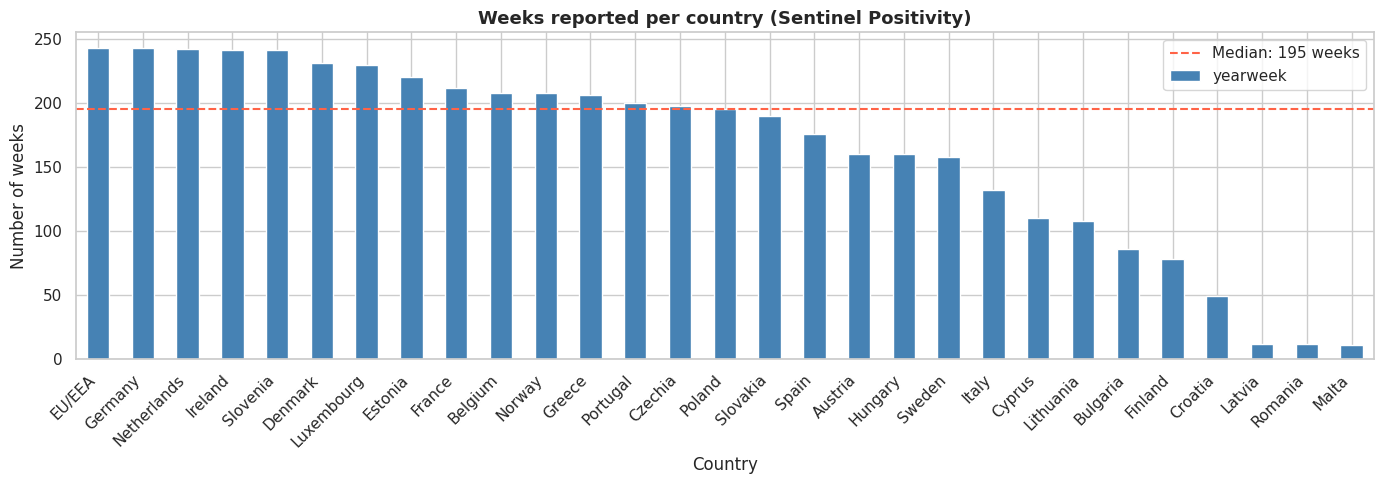


Reliable countries (15): ['EU/EEA', 'Germany', 'Netherlands', 'Ireland', 'Slovenia', 'Denmark', 'Luxembourg', 'Estonia', 'France', 'Belgium', 'Norway', 'Greece', 'Portugal', 'Czechia', 'Poland']


In [6]:
# Filter to positivity only and all ages (to avoid duplicates)
df_pos = df[(df['indicator'] == 'positivity') & (df['age'] == 'total')].copy()

coverage = df_pos.groupby('countryname')['yearweek'].nunique().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(14, 5))
coverage.plot(kind='bar', ax=ax, color='steelblue', edgecolor='white')
ax.axhline(coverage.median(), color='tomato', linestyle='--', label=f'Median: {coverage.median():.0f} weeks')
ax.set_title('Weeks reported per country (Sentinel Positivity)', fontsize=13, fontweight='bold')
ax.set_xlabel('Country')
ax.set_ylabel('Number of weeks')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

reliable_countries = coverage[coverage >= coverage.median()].index.tolist()
print(f'\nReliable countries ({len(reliable_countries)}): {reliable_countries}')

## Step 5 — Positivity Over Time by Pathogen

Pathogens: ['Influenza' 'RSV' 'SARS-CoV-2']


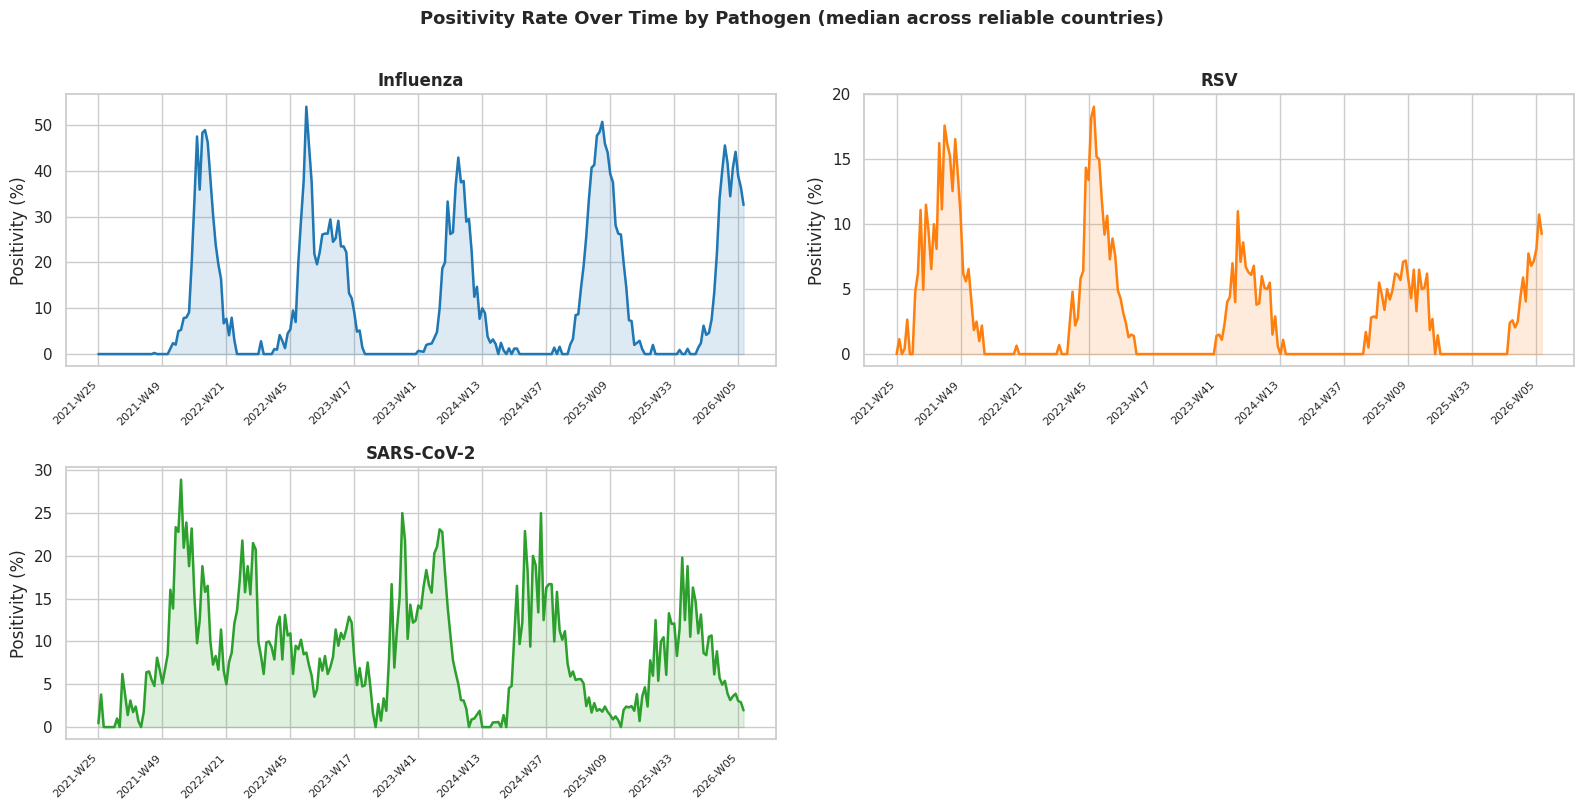

In [7]:
df_reliable = df_pos[df_pos['countryname'].isin(reliable_countries)].copy()

# Aggregate: median positivity per week per pathogen across reliable countries
df_agg = df_reliable.groupby(['yearweek', 'pathogen'])['value'].median().reset_index()
df_agg = df_agg.sort_values('yearweek')

pathogens = df_agg['pathogen'].unique()
print(f'Pathogens: {pathogens}')

n = len(pathogens)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()

for i, pathogen in enumerate(pathogens):
    data = df_agg[df_agg['pathogen'] == pathogen]
    x = range(len(data))
    axes[i].plot(x, data['value'], linewidth=1.8, color=f'C{i}')
    axes[i].fill_between(x, data['value'], alpha=0.15, color=f'C{i}')
    axes[i].set_title(pathogen, fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Positivity (%)')
    tick_step = max(1, len(data) // 10)
    tick_idx = list(range(0, len(data), tick_step))
    axes[i].set_xticks(tick_idx)
    axes[i].set_xticklabels(data['yearweek'].iloc[tick_idx], rotation=45, ha='right', fontsize=8)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Positivity Rate Over Time by Pathogen (median across reliable countries)',
             fontsize=13, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

## Step 6 — Missing Data Heatmap

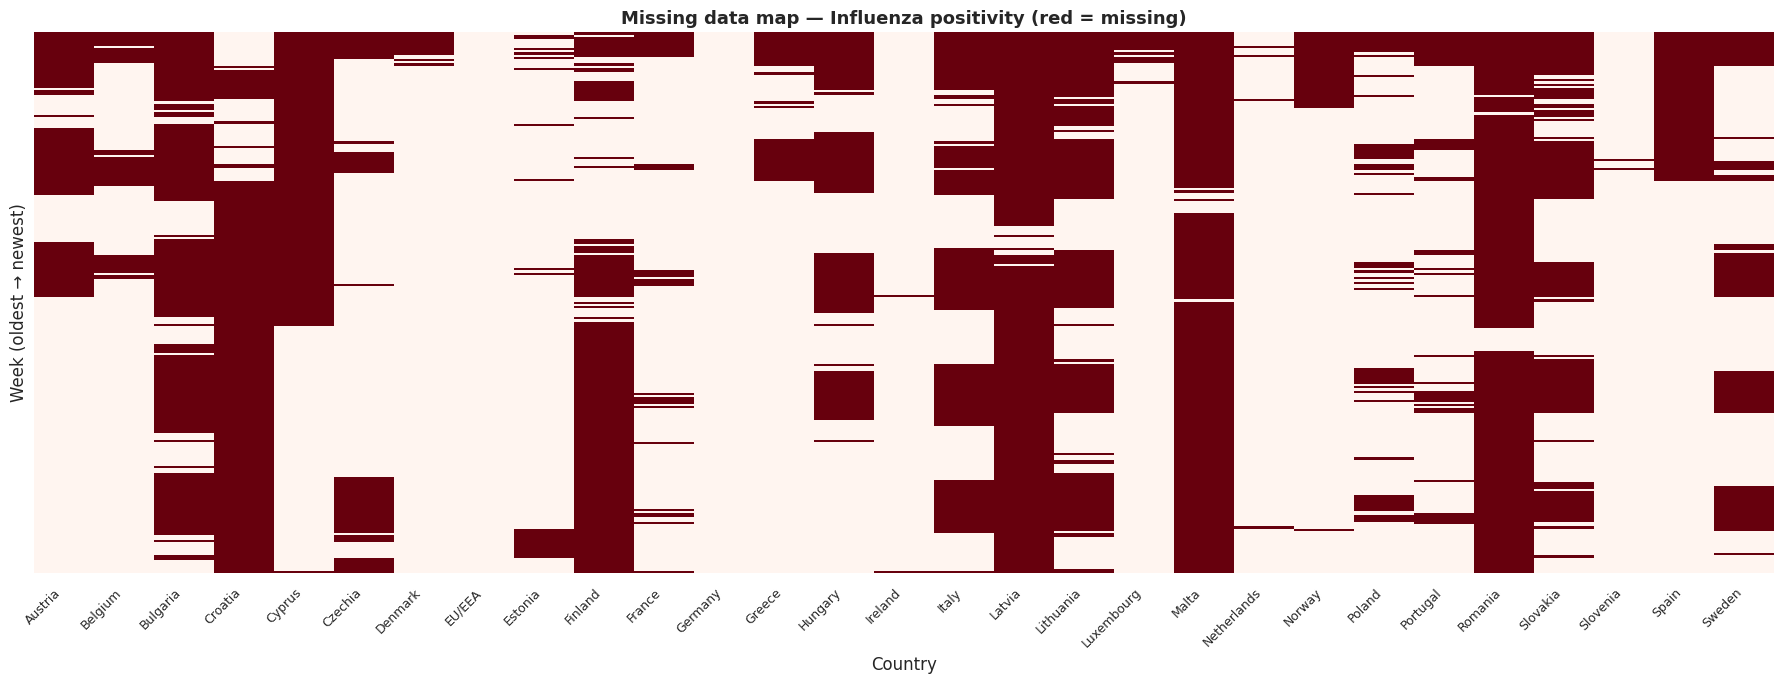

In [8]:
# Pivot: rows = yearweek, columns = countryname, values = positivity for Influenza
pivot_missing = df_pos[df_pos['pathogen'] == 'Influenza'].pivot_table(
    index='yearweek', columns='countryname', values='value'
)

fig, ax = plt.subplots(figsize=(18, 7))
sns.heatmap(
    pivot_missing.isnull().astype(int),
    cmap='Reds', cbar=False, ax=ax,
    linewidths=0, xticklabels=True, yticklabels=False
)
ax.set_title('Missing data map — Influenza positivity (red = missing)', fontsize=13, fontweight='bold')
ax.set_xlabel('Country')
ax.set_ylabel('Week (oldest → newest)')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()

## Step 7 — Correlation Between Pathogens

Multi-pathogen matrix: (243, 3)
→ 243 weeks | 3 pathogens


pathogen,Influenza,RSV,SARS-CoV-2
yearweek,,,
2021-W25,0.0,0.00,0.45
2021-W26,0.0,1.15,3.80
2021-W27,0.0,0.00,0.00
2021-W28,0.0,0.40,0.00
2021-W29,0.0,2.65,0.00


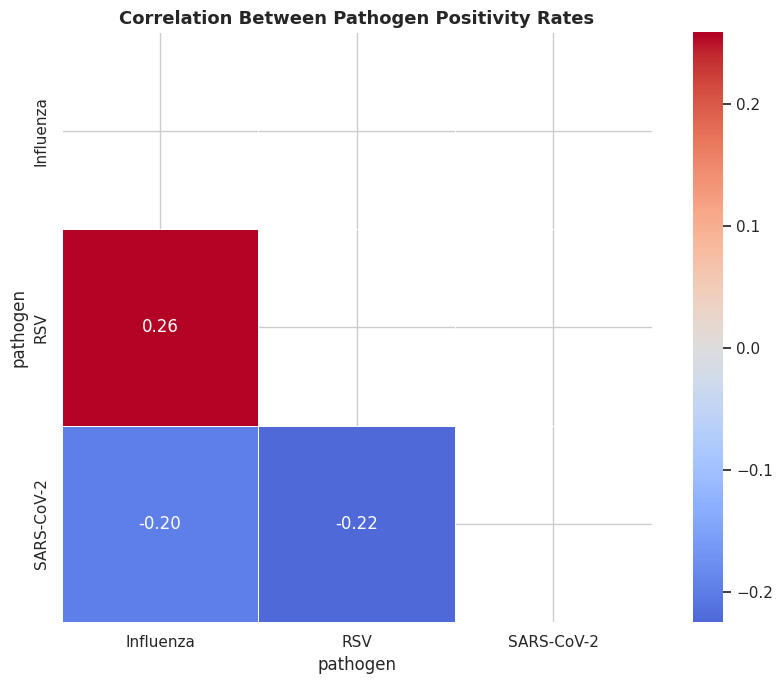

In [9]:
# Multi-pathogen matrix: rows = yearweek, columns = pathogen
pivot_viruses = df_reliable.pivot_table(
    index='yearweek',
    columns='pathogen',
    values='value',
    aggfunc='median'
)

print(f'Multi-pathogen matrix: {pivot_viruses.shape}')
print(f'→ {pivot_viruses.shape[0]} weeks | {pivot_viruses.shape[1]} pathogens')
display(pivot_viruses.head())

fig, ax = plt.subplots(figsize=(9, 7))
corr = pivot_viruses.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    corr, mask=mask, annot=True, fmt='.2f',
    cmap='coolwarm', center=0, square=True,
    linewidths=0.5, ax=ax
)
ax.set_title('Correlation Between Pathogen Positivity Rates', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

## Step 8 — Seasonality Check (Monthly Boxplots)

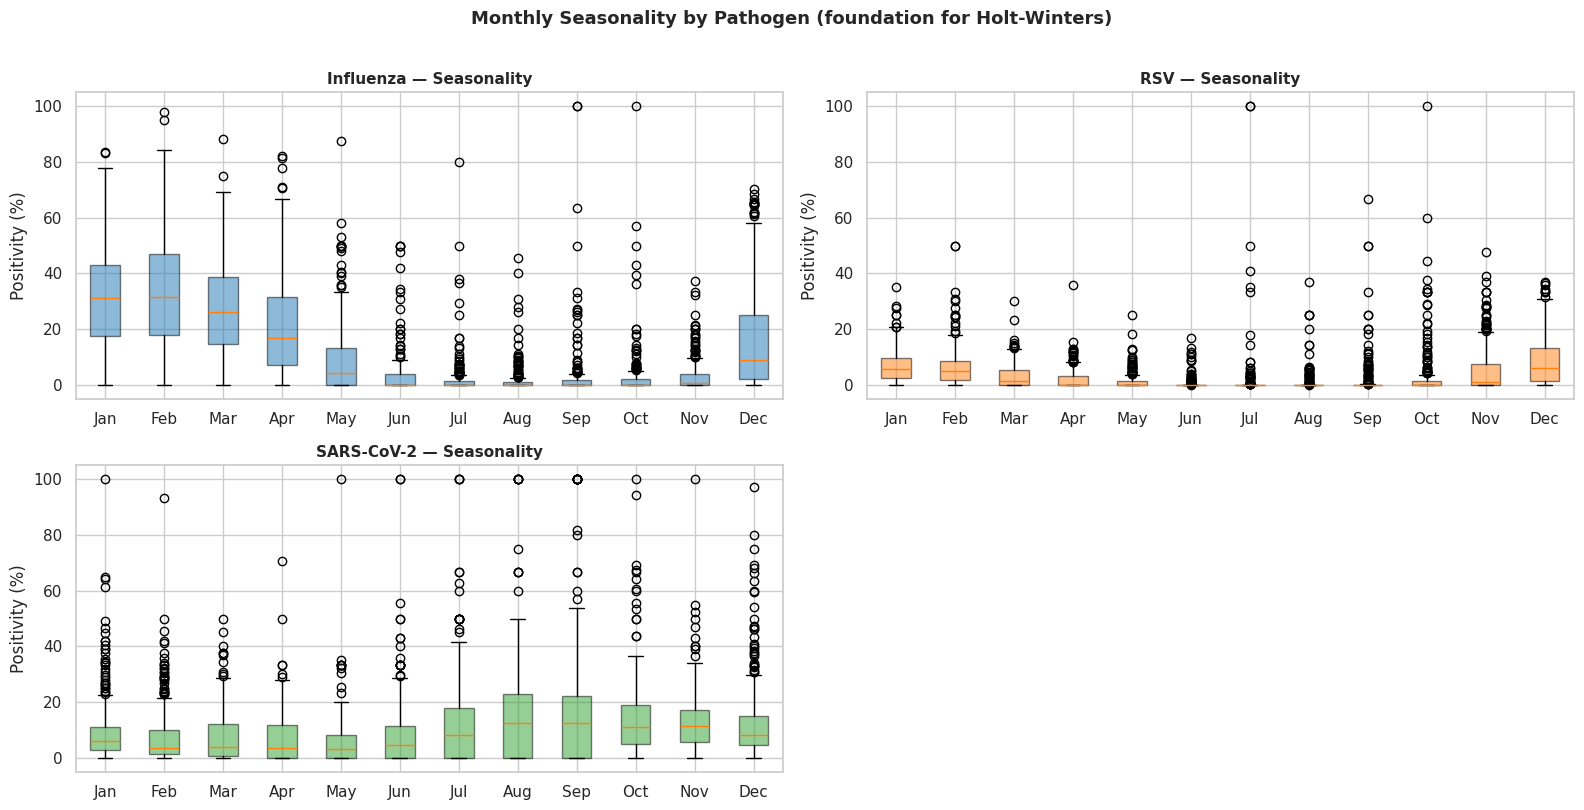

In [10]:
# yearweek format is YYYY-Www (e.g. 2024-W03)
df_reliable['week_num'] = df_reliable['yearweek'].str.extract(r'W(\d+)').astype(int)
df_reliable['approx_month'] = ((df_reliable['week_num'] - 1) // 4 + 1).clip(1, 12)

month_names = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
               7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

pathogens = df_reliable['pathogen'].unique()
n = len(pathogens)
fig, axes = plt.subplots((n + 1) // 2, 2, figsize=(16, (n + 1) // 2 * 4))
axes = axes.flatten()

for i, pathogen in enumerate(pathogens):
    data = df_reliable[df_reliable['pathogen'] == pathogen]
    monthly = data.groupby('approx_month')['value'].apply(list)
    axes[i].boxplot(
        [monthly.get(m, [0]) for m in range(1, 13)],
        labels=[month_names[m] for m in range(1, 13)],
        patch_artist=True,
        boxprops=dict(facecolor=f'C{i}', alpha=0.5)
    )
    axes[i].set_title(f'{pathogen} — Seasonality', fontsize=11, fontweight='bold')
    axes[i].set_ylabel('Positivity (%)')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Monthly Seasonality by Pathogen (foundation for Holt-Winters)',
             fontsize=13, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

## Step 9 Build Enriched Multi-Source TDA Matrix

In [50]:
# --- Signal 1: Sentinel positivity per pathogen ---
sig1 = pivot_viruses.copy()
sig1.columns = [f'sentinel_{c}' for c in sig1.columns]

# --- Signal 2: Non-sentinel positivity per pathogen (same unit as sentinel) ---
sig2 = (
    dfs['nonSentinelTestsDetections.csv']
    [
        (dfs['nonSentinelTestsDetections.csv']['age'] == 'total') &
        (dfs['nonSentinelTestsDetections.csv']['indicator'] == 'detections')
    ]
    .pivot_table(index='yearweek', columns='pathogen', values='value', aggfunc='median')
)
# Convert detections to positivity rate using tests
tests = (
    dfs['nonSentinelTestsDetections.csv']
    [
        (dfs['nonSentinelTestsDetections.csv']['age'] == 'total') &
        (dfs['nonSentinelTestsDetections.csv']['indicator'] == 'tests')
    ]
    .pivot_table(index='yearweek', columns='pathogen', values='value', aggfunc='median')
)
sig2 = (sig2 / tests * 100).dropna(how='all')
sig2.columns = [f'nonsentinel_{c}' for c in sig2.columns]

# --- Join: only positivity-based signals ---
tda_matrix_enriched = (
    sig1
    .join(sig2, how='outer')
    .sort_index()
)

thresh = int(tda_matrix_enriched.shape[1] * 0.6)
tda_matrix_enriched = tda_matrix_enriched.dropna(thresh=thresh)
tda_matrix_enriched = tda_matrix_enriched.fillna(tda_matrix_enriched.median())

print('=== TDA MATRIX (positivity only) ===')
print(f'Shape  : {tda_matrix_enriched.shape}')
print(f'→ {tda_matrix_enriched.shape[0]} weeks  |  {tda_matrix_enriched.shape[1]} dimensions')
print(f'\nDimensions:')
for col in tda_matrix_enriched.columns:
    print(f'  {col}')

=== TDA MATRIX (positivity only) ===
Shape  : (243, 6)
→ 243 weeks  |  6 dimensions

Dimensions:
  sentinel_Influenza
  sentinel_RSV
  sentinel_SARS-CoV-2
  nonsentinel_Influenza
  nonsentinel_RSV
  nonsentinel_SARS-CoV-2


## EXTRA STEP: PCA preview of enriched matrix

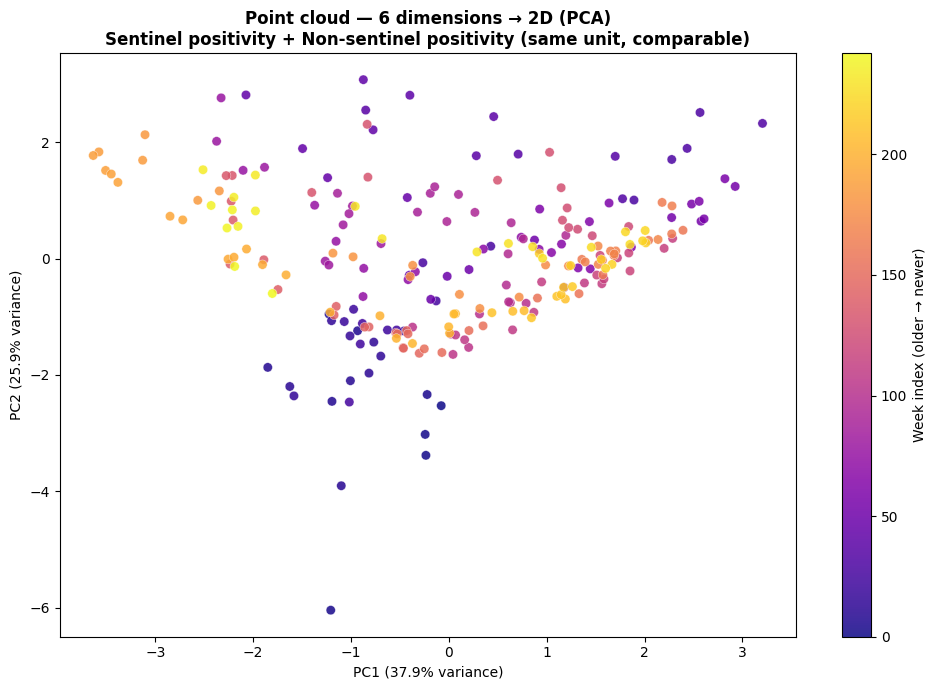

Variance explained by 2 PCs: 63.9%


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = StandardScaler().fit_transform(tda_matrix_enriched)
weeks = tda_matrix_enriched.index.tolist()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig, ax = plt.subplots(figsize=(10, 7))
sc = ax.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=range(len(X_pca)), cmap='plasma',
    s=45, alpha=0.85, edgecolors='white', linewidths=0.3
)
plt.colorbar(sc, ax=ax, label='Week index (older → newer)')
ax.set_title(
    f'Point cloud — {tda_matrix_enriched.shape[1]} dimensions → 2D (PCA)\n'
    'Sentinel positivity + Non-sentinel positivity (same unit, comparable)',
    fontsize=12, fontweight='bold'
)
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.tight_layout()
plt.show()

print(f'Variance explained by 2 PCs: {sum(pca.explained_variance_ratio_)*100:.1f}%')

## Validation

Total anomaly weeks  : 30
Rising  (restock ↑)  : 20  → ['2021-W43', '2021-W44', '2021-W46', '2021-W48', '2021-W52', '2022-W01', '2022-W02', '2022-W42', '2022-W43', '2022-W44', '2022-W45', '2022-W46', '2022-W47', '2023-W44', '2023-W45', '2024-W26', '2024-W27', '2024-W43', '2025-W09', '2025-W36']
Falling (wind down ↓): 10 → ['2021-W45', '2021-W47', '2021-W49', '2021-W50', '2021-W51', '2022-W03', '2023-W28', '2024-W25', '2025-W10', '2025-W39']


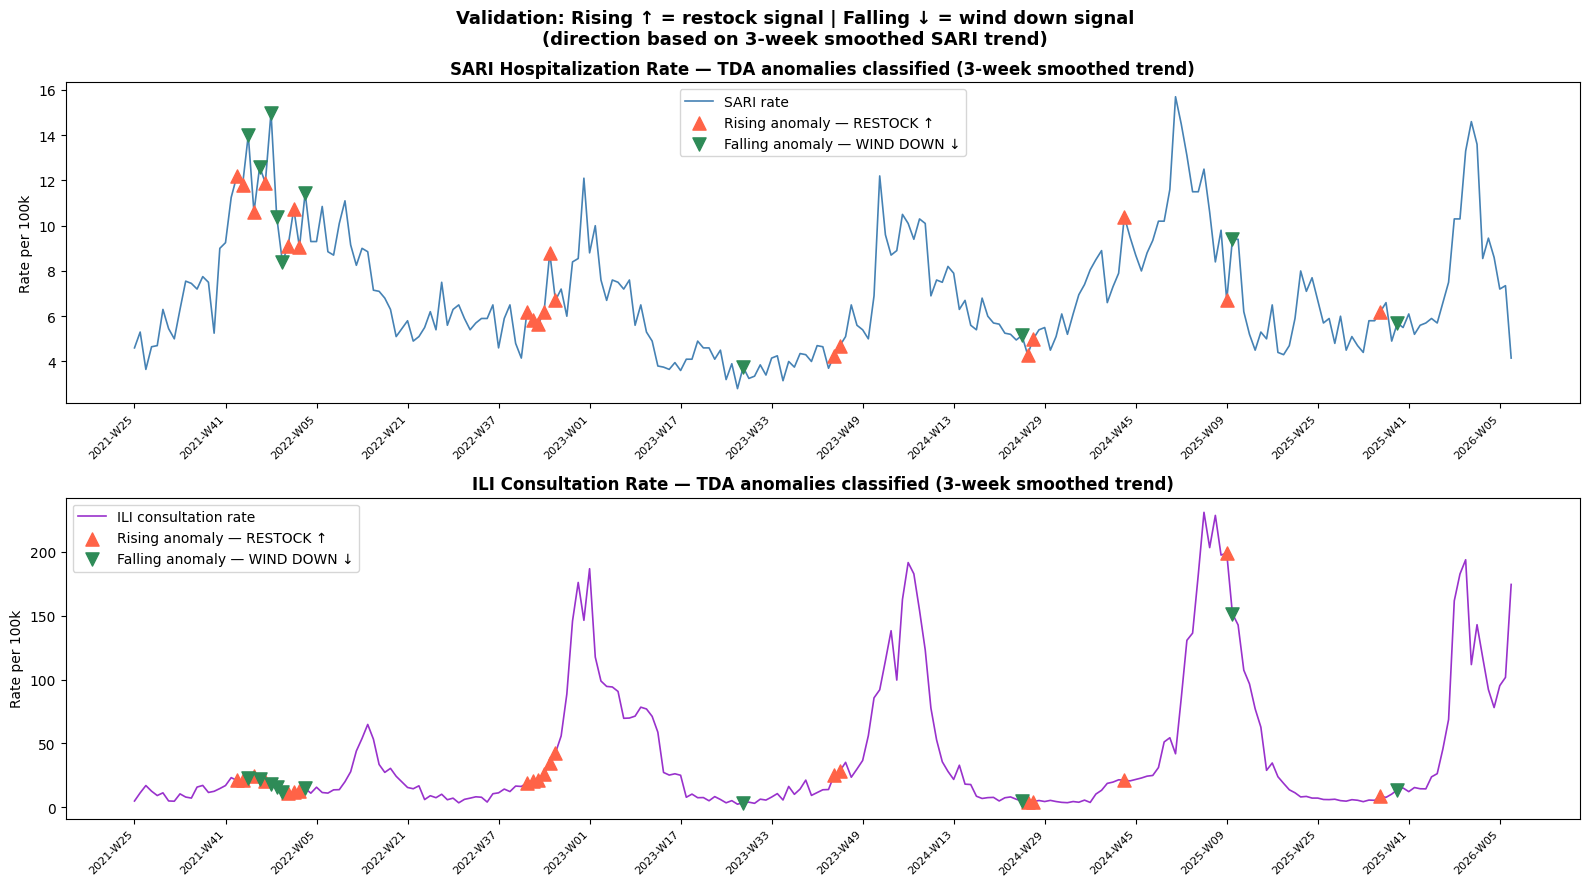


=== VALIDATION SUMMARY ===
SARI median overall:           6.3
SARI median at rising weeks:   6.7
SARI median at falling weeks:  9.9

ILI median overall:            17.1
ILI median at rising weeks:    21.1
ILI median at falling weeks:   15.5


In [71]:
# ── Validation: do SARI and ILI confirm TDA anomaly weeks? ─────────────────

sari = (
    dfs['SARIRates.csv']
    [dfs['SARIRates.csv']['age'] == 'total']
    .groupby('yearweek')['value'].median()
    .sort_index()
)

ili = (
    dfs['ILIARIRates.csv']
    [
        (dfs['ILIARIRates.csv']['age'] == 'total') &
        (dfs['ILIARIRates.csv']['indicator'] == 'ILIconsultationrate')
    ]
    .groupby('yearweek')['value'].median()
    .sort_index()
)

# ── Classify anomalies using 3-week smoothed trend (avoids week-to-week noise)
sari_trend = sari.rolling(3, center=True).mean().diff()
tda_anomaly_weeks = set([window_labels[i] for i in anomaly_idx])

rising_weeks  = {w for w in tda_anomaly_weeks if w in sari_trend.index and sari_trend[w] > 0}
falling_weeks = {w for w in tda_anomaly_weeks if w in sari_trend.index and sari_trend[w] <= 0}

print(f'Total anomaly weeks  : {len(tda_anomaly_weeks)}')
print(f'Rising  (restock ↑)  : {len(rising_weeks)}  → {sorted(rising_weeks)}')
print(f'Falling (wind down ↓): {len(falling_weeks)} → {sorted(falling_weeks)}')

# ── Helper to get x positions and y values ──────────────────────────────────
def get_positions(series, weeks):
    idx_list = list(series.index)
    xs = [idx_list.index(w) for w in weeks if w in idx_list]
    ys = [series[w] for w in weeks if w in idx_list]
    return xs, ys

# ── Plot ─────────────────────────────────────────────────────────────────────
fig, axes = plt.subplots(2, 1, figsize=(16, 9), sharex=False)

for ax, series, color_line, label_line, title in zip(
    axes,
    [sari, ili],
    ['steelblue', 'darkorchid'],
    ['SARI rate', 'ILI consultation rate'],
    ['SARI Hospitalization Rate', 'ILI Consultation Rate']
):
    ax.plot(range(len(series)), series.values,
            color=color_line, linewidth=1.2, label=label_line)

    rx, ry = get_positions(series, rising_weeks)
    ax.scatter(rx, ry, color='tomato', zorder=5, s=90,
               label='Rising anomaly — RESTOCK ↑', marker='^')

    fx, fy = get_positions(series, falling_weeks)
    ax.scatter(fx, fy, color='seagreen', zorder=5, s=90,
               label='Falling anomaly — WIND DOWN ↓', marker='v')

    ax.set_title(f'{title} — TDA anomalies classified (3-week smoothed trend)',
                 fontweight='bold')
    ax.set_ylabel('Rate per 100k')
    ax.legend()

    step = max(1, len(series) // 15)
    ax.set_xticks(range(0, len(series), step))
    ax.set_xticklabels(list(series.index)[::step], rotation=45, ha='right', fontsize=8)

plt.suptitle('Validation: Rising ↑ = restock signal | Falling ↓ = wind down signal\n(direction based on 3-week smoothed SARI trend)',
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# ── Summary ──────────────────────────────────────────────────────────────────
print('\n=== VALIDATION SUMMARY ===')
print(f'SARI median overall:           {sari.median():.1f}')
print(f'SARI median at rising weeks:   {sari[[w for w in rising_weeks  if w in sari.index]].median():.1f}')
print(f'SARI median at falling weeks:  {sari[[w for w in falling_weeks if w in sari.index]].median():.1f}')
print(f'\nILI median overall:            {ili.median():.1f}')
print(f'ILI median at rising weeks:    {ili[[w for w in rising_weeks  if w in ili.index]].median():.1f}')
print(f'ILI median at falling weeks:   {ili[[w for w in falling_weeks if w in ili.index]].median():.1f}')

## Step 10 — Summary & Next Steps

| Step | Status |
|------|--------|
| Data loaded (9 files) | ✓ |
| Structure & columns understood | ✓ |
| Temporal coverage mapped | ✓ |
| Positivity series per pathogen | ✓ |
| Missing data heatmap | ✓ |
| Pathogen correlation | ✓ |
| Seasonality confirmed | ✓ |
| TDA matrix built + PCA preview | ✓ |
| **Holt-Winters per pathogen** | ⏭ next |
| **TDA with Ripser / Giotto-TDA** | ⏭ next |
| **Medicine matching** | ⏭ next |

**Key findings to carry forward:**
- `sentinelTestsDetectionsPositivity.csv` is the anchor file — filter by `indicator == 'positivity'` and `age == 'total'`
- `tda_matrix` is ready: weeks × pathogens, scaled, no nulls
- `activityFluTypeSubtype.csv` can add Influenza subtype dimensions to `tda_matrix` for richer topology
- `nonSentinelSeverity.csv` can validate: if TDA detects an anomalous cluster, do deaths spike too?

#  Holt-Winters Analysis

## 1. Prepare the series

In [72]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd

PATHOGEN = 'Influenza'
COUNTRY  = 'Germany'

series_raw = (
    df_pos[
        (df_pos['pathogen'] == PATHOGEN) &
        (df_pos['countryname'] == COUNTRY)
    ]
    .sort_values('yearweek')
    .set_index('yearweek')['value']
    .dropna()
)

# Convert string index to proper DatetimeIndex (Monday of each ISO week)
series_raw.index = pd.to_datetime(
    [f"{yw}-1" for yw in series_raw.index],
    format="%G-W%V-%u"
)
series_raw.index.freq = pd.tseries.frequencies.to_offset('W-MON')

# Exclude 2021: COVID disrupted baseline seasonality → model collapses
TRAIN_START = '2022-01-01'
series = series_raw[series_raw.index >= TRAIN_START]

print(f'Full series : {len(series_raw)} weeks')
print(f'Training    : {len(series)} weeks  (from {TRAIN_START})')
print(series.head())

Full series : 243 weeks
Training    : 215 weeks  (from 2022-01-01)
2022-01-03    4.7
2022-01-10    2.1
2022-01-17    1.5
2022-01-24    2.9
2022-01-31    5.1
Freq: W-MON, Name: value, dtype: float64


## 2. Fit Holt-Winters

In [73]:
# Trying both additive and multiplicative seasonal — pick by AIC
results = {}
for seasonal_type in ['add', 'mul']:
    try:
        m = ExponentialSmoothing(
            series,
            trend='add',
            seasonal=seasonal_type,
            seasonal_periods=52,
            initialization_method='estimated'
        ).fit(optimized=True)
        results[seasonal_type] = m
        print(f"[{seasonal_type:>3}] AIC={m.aic:.1f}  α={m.params['smoothing_level']:.3f}  "
              f"β={m.params['smoothing_trend']:.3f}  γ={m.params['smoothing_seasonal']:.3f}")
    except Exception as e:
        print(f"[{seasonal_type}] failed: {e}")

best_type = min(results, key=lambda k: results[k].aic)
fit = results[best_type]
print(f"\nBest model: seasonal='{best_type}'  AIC={fit.aic:.1f}")
print(fit.summary())

[add] AIC=776.9  α=1.000  β=0.000  γ=0.000
[mul] failed: endog must be strictly positive when usingmultiplicative trend or seasonal components.

Best model: seasonal='add'  AIC=776.9
                       ExponentialSmoothing Model Results                       
Dep. Variable:                    value   No. Observations:                  215
Model:             ExponentialSmoothing   SSE                           4737.527
Optimized:                         True   AIC                            776.916
Trend:                         Additive   BIC                            965.672
Seasonal:                      Additive   AICC                           820.788
Seasonal Periods:                    52   Date:                 Sat, 21 Feb 2026
Box-Cox:                          False   Time:                         18:07:25
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
------

## 3. Forecast + Plot

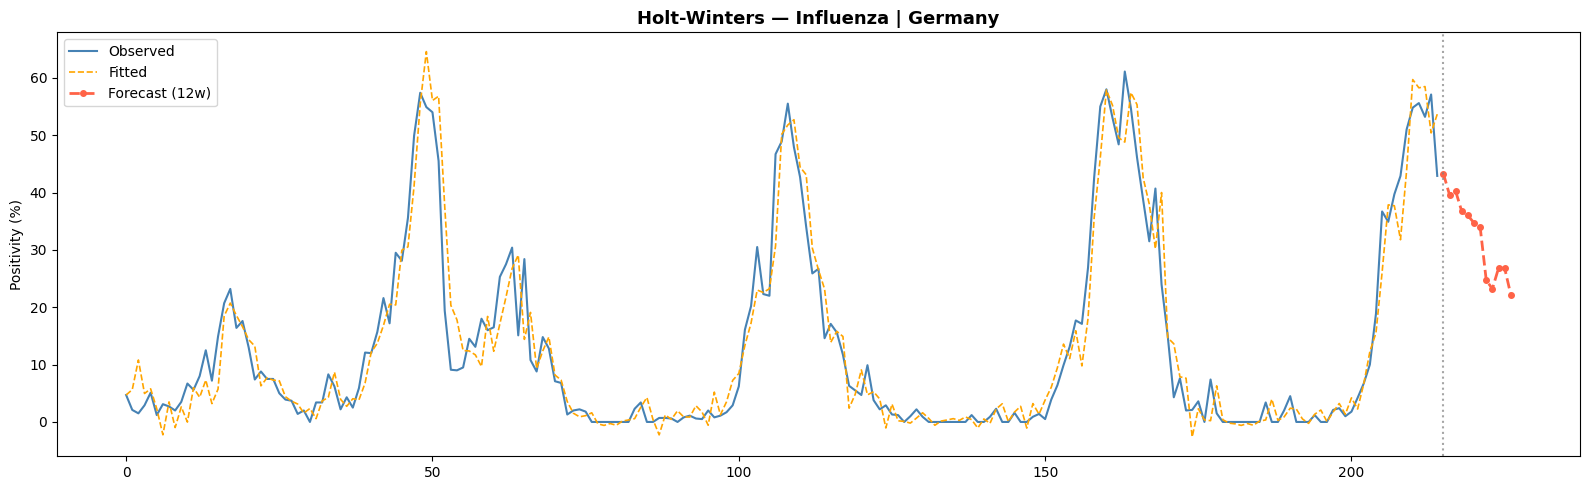

In [74]:
FORECAST_WEEKS = 12

forecast = fit.forecast(FORECAST_WEEKS)
fitted   = fit.fittedvalues

fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(range(len(series)), series.values,
        label='Observed', color='steelblue', linewidth=1.5)

ax.plot(range(len(series)), fitted.values,
        label='Fitted', color='orange', linewidth=1.2, linestyle='--')

ax.plot(range(len(series), len(series) + FORECAST_WEEKS), forecast.values,
        label=f'Forecast ({FORECAST_WEEKS}w)', color='tomato',
        linewidth=2, linestyle='--', marker='o', markersize=4)

ax.axvline(len(series), color='gray', linestyle=':', alpha=0.7)
ax.set_title(f'Holt-Winters — {PATHOGEN} | {COUNTRY}', fontsize=13, fontweight='bold')
ax.set_ylabel('Positivity (%)')
ax.legend()
plt.tight_layout()
plt.show()

## 4. Residuals as Early Warning

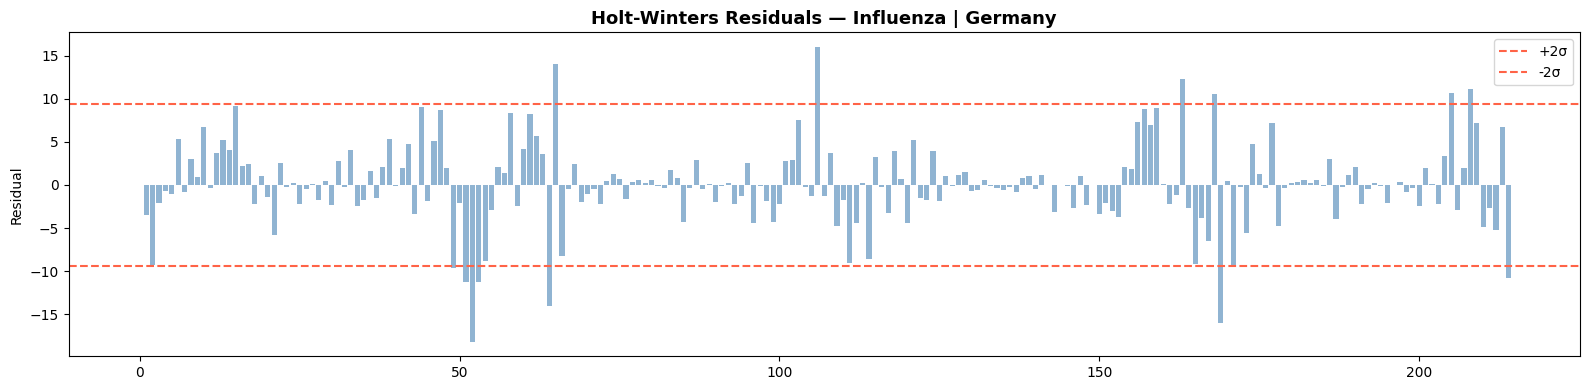

Anomalous weeks by Winters: [Timestamp('2022-12-12 00:00:00'), Timestamp('2022-12-26 00:00:00'), Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-09 00:00:00'), Timestamp('2023-03-27 00:00:00'), Timestamp('2023-04-03 00:00:00'), Timestamp('2024-01-15 00:00:00'), Timestamp('2025-02-17 00:00:00'), Timestamp('2025-03-24 00:00:00'), Timestamp('2025-03-31 00:00:00'), Timestamp('2025-12-08 00:00:00'), Timestamp('2025-12-29 00:00:00'), Timestamp('2026-02-09 00:00:00')]


In [75]:
# Large residuals = model couldn't explain that week = potential anomaly
residuals = series.values - fitted.values
std = residuals.std()

fig, ax = plt.subplots(figsize=(16, 4))
ax.bar(range(len(residuals)), residuals, color='steelblue', alpha=0.6)
ax.axhline( 2 * std, color='tomato', linestyle='--', label='+2σ')
ax.axhline(-2 * std, color='tomato', linestyle='--', label='-2σ')
ax.set_title(f'Holt-Winters Residuals — {PATHOGEN} | {COUNTRY}', fontsize=13, fontweight='bold')
ax.set_ylabel('Residual')
ax.legend()
plt.tight_layout()
plt.show()

anomaly_weeks = series.index[np.abs(residuals) > 2 * std]
print(f'Anomalous weeks by Winters: {list(anomaly_weeks)}')

# TDA

In [22]:
!pip install ripser persim scikit-tda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 3.3 MB/s eta 0:00:00


In [76]:
# run once in terminal:  pip install ripser persim scikit-tda
import ripser
from ripser import ripser as rips
from persim import plot_diagrams, PersistenceImager
from sklearn.preprocessing import StandardScaler
import numpy as np

## 2. TDA Matrix

In [77]:
# tda_matrix already built in EDA Step 9
# rows = weeks, columns = pathogens, values = positivity
X = StandardScaler().fit_transform(tda_matrix_enriched)
weeks = tda_matrix_enriched.index.tolist()

print(f'TDA input: {X.shape}  ({X.shape[0]} weeks × {X.shape[1]} pathogens)')

TDA input: (243, 6)  (243 weeks × 6 pathogens)


## 3. Persistance Diagram

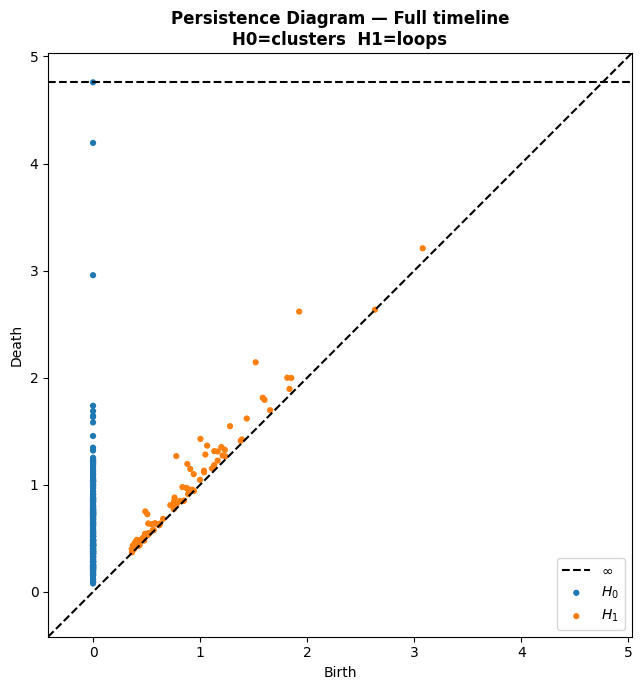

H0 features: 243
H1 features: 81


In [78]:
# Compute H0 (clusters) and H1 (loops)
diagrams = rips(X, maxdim=1)['dgms']

fig, ax = plt.subplots(figsize=(7, 7))
plot_diagrams(diagrams, ax=ax)
ax.set_title('Persistence Diagram — Full timeline\nH0=clusters  H1=loops',
             fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# Points far from diagonal = persistent topological features = real signal
print(f'H0 features: {len(diagrams[0])}')
print(f'H1 features: {len(diagrams[1])}')

## 4. Sliding Window Anomaly Detection

In [79]:
from scipy.spatial.distance import directed_hausdorff

WINDOW = 12   # weeks per window

def persistence_entropy(dgm):
    """Summarize a persistence diagram as a single scalar."""
    lifetimes = dgm[:, 1] - dgm[:, 0]
    lifetimes = lifetimes[np.isfinite(lifetimes)]
    if lifetimes.sum() == 0:
        return 0
    p = lifetimes / lifetimes.sum()
    return -np.sum(p * np.log(p + 1e-10))

entropies_h0 = []
entropies_h1 = []
window_labels = []

for i in range(len(X) - WINDOW + 1):
    window = X[i : i + WINDOW]
    dgms   = rips(window, maxdim=1)['dgms']

    entropies_h0.append(persistence_entropy(dgms[0]))
    entropies_h1.append(persistence_entropy(dgms[1]))
    window_labels.append(weeks[i + WINDOW - 1])   # label = last week in window

print(f'Windows computed: {len(entropies_h0)}')

Windows computed: 232


## 5. Anomaly Signals over Time

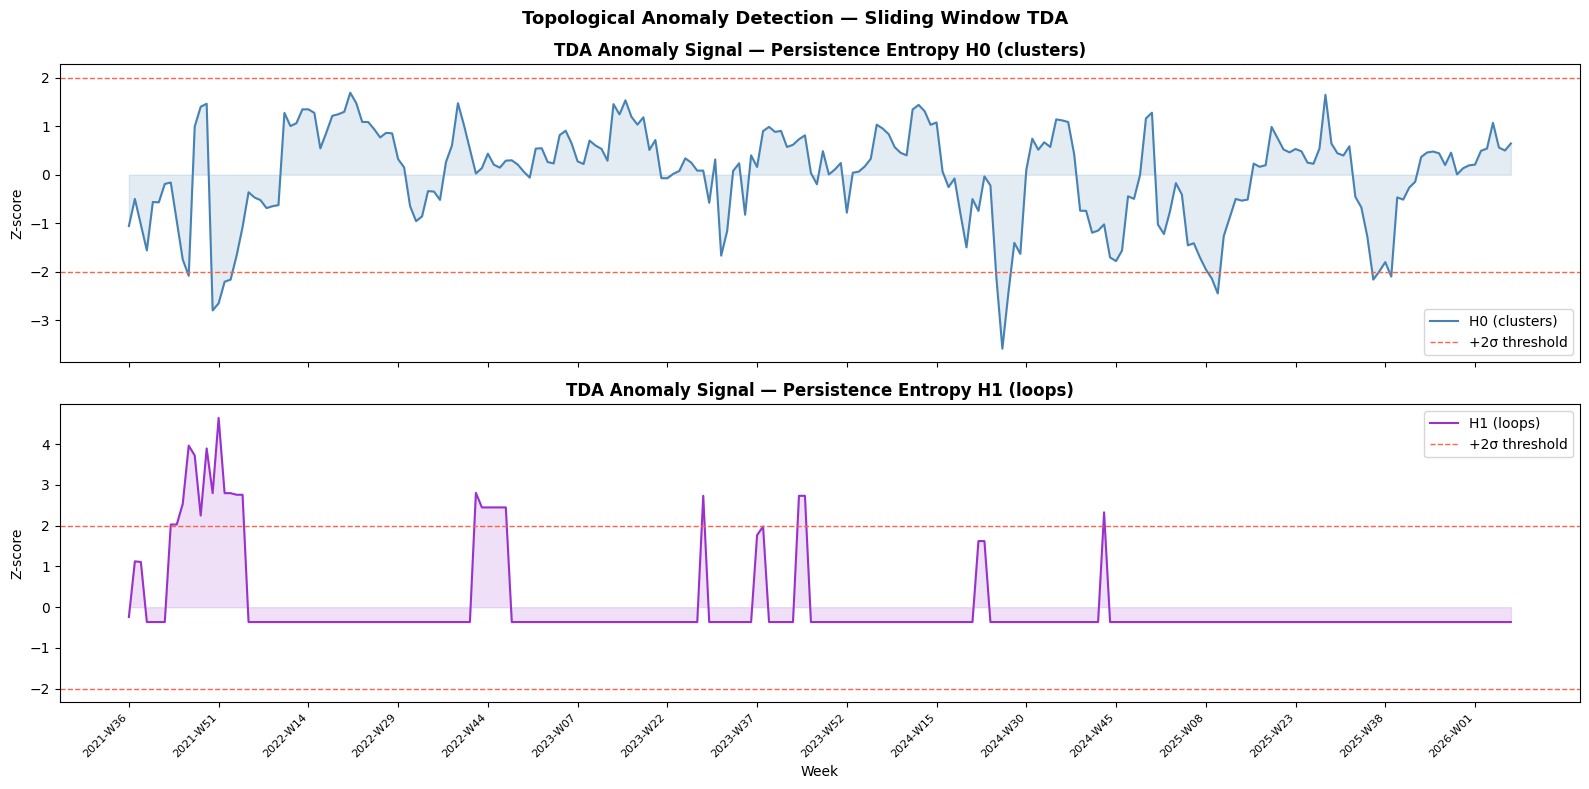


Topological anomalies detected at:
  2021-W43  — z0=-0.16  z1=2.03
  2021-W44  — z0=-0.96  z1=2.03
  2021-W45  — z0=-1.75  z1=2.53
  2021-W46  — z0=-2.09  z1=3.96
  2021-W47  — z0=0.99  z1=3.72
  2021-W48  — z0=1.40  z1=2.25
  2021-W49  — z0=1.47  z1=3.89
  2021-W50  — z0=-2.80  z1=2.80
  2021-W51  — z0=-2.66  z1=4.64
  2021-W52  — z0=-2.21  z1=2.80
  2022-W01  — z0=-2.17  z1=2.80
  2022-W02  — z0=-1.67  z1=2.76
  2022-W03  — z0=-1.08  z1=2.76
  2022-W42  — z0=0.03  z1=2.81
  2022-W43  — z0=0.14  z1=2.45
  2022-W44  — z0=0.44  z1=2.45
  2022-W45  — z0=0.21  z1=2.45
  2022-W46  — z0=0.15  z1=2.45
  2022-W47  — z0=0.29  z1=2.45
  2023-W28  — z0=0.09  z1=2.73
  2023-W44  — z0=0.73  z1=2.73
  2023-W45  — z0=0.81  z1=2.73
  2024-W25  — z0=-2.13  z1=-0.36
  2024-W26  — z0=-3.59  z1=-0.36
  2024-W27  — z0=-2.45  z1=-0.36
  2024-W43  — z0=-1.03  z1=2.33
  2025-W09  — z0=-2.14  z1=-0.36
  2025-W10  — z0=-2.45  z1=-0.36
  2025-W36  — z0=-2.16  z1=-0.36
  2025-W39  — z0=-2.10  z1=-0.36


In [61]:
e0 = np.array(entropies_h0)
e1 = np.array(entropies_h1)

# Z-score to detect spikes
z0 = (e0 - e0.mean()) / e0.std()
z1 = (e1 - e1.mean()) / e1.std()

fig, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

for ax, z, label, color in zip(axes, [z0, z1], ['H0 (clusters)', 'H1 (loops)'], ['steelblue', 'darkorchid']):
    ax.plot(range(len(z)), z, color=color, linewidth=1.5, label=label)
    ax.fill_between(range(len(z)), z, alpha=0.15, color=color)
    ax.axhline( 2.0, color='tomato',   linestyle='--', linewidth=1,   label='+2σ threshold')
    ax.axhline(-2.0, color='tomato',   linestyle='--', linewidth=1)
    ax.axhline( 3.0, color='darkred',  linestyle=':',  linewidth=0.8, label='+3σ solo threshold')
    ax.axhline(-3.0, color='darkred',  linestyle=':',  linewidth=0.8)
    ax.set_ylabel('Z-score')
    ax.set_title(f'TDA Anomaly Signal — Persistence Entropy {label}', fontweight='bold')
    ax.legend()

tick_step = max(1, len(window_labels) // 15)
axes[1].set_xticks(range(0, len(window_labels), tick_step))
axes[1].set_xticklabels(window_labels[::tick_step], rotation=45, ha='right', fontsize=8)
axes[1].set_xlabel('Week')

plt.suptitle('Topological Anomaly Detection — Sliding Window TDA',
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# ── Anomaly logic: require BOTH dimensions OR a very strong single signal ──
# Pure H1>2σ with H0 near zero was generating false positives
THRESHOLD   = 2.0
STRONG_SOLO = 3.0   # a single dimension this extreme qualifies alone

both_triggered = (np.abs(z0) > THRESHOLD) & (np.abs(z1) > THRESHOLD)
strong_solo_h0 = np.abs(z0) > STRONG_SOLO
strong_solo_h1 = np.abs(z1) > STRONG_SOLO

anomaly_mask = both_triggered | strong_solo_h0 | strong_solo_h1
anomaly_idx  = np.where(anomaly_mask)[0]

print(f'\nAnomaly detection comparison:')
print(f'  Loose OR (old)  : {len(np.where((np.abs(z0) > 2) | (np.abs(z1) > 2))[0])} weeks')
print(f'  Strict (new)    : {len(anomaly_idx)} weeks')
print(f'\nTopological anomalies detected (strict):')
for idx in anomaly_idx:
    trigger = []
    if both_triggered[idx]: trigger.append('both')
    if strong_solo_h0[idx]: trigger.append('H0-solo')
    if strong_solo_h1[idx]: trigger.append('H1-solo')
    print(f'  {window_labels[idx]}  z0={z0[idx]:+.2f}  z1={z1[idx]:+.2f}  → {", ".join(trigger)}')